# Curse of Dimensionality

* The number of points needed to densely populate a space grows quickly with dimensionality. If you add informative, discriminating features - more features can be helpful - but you will need more and more points to fully understand the space.

* Things do not always behave as you would expect in high dimensions - this is part of the Curse of Dimensionality. 

## Unit Porcupine:  The unit hyper-sphere inscribed within the unit hyper-cube.

* Consider a sphere with radius $r$ in $D$ dimensions
\begin{equation}
S = \left\{ \mathbf{x} \left| \sum_{i=1}^D x_i^2 \le r^2 \right. \right\} \nonumber
\end{equation}
It's volume is: 
\begin{equation}
v_D(r) = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2} + 1)} \nonumber
\end{equation}
where $\Gamma(n) = \int_0^\infty e^{-x}x^{n-1}dx$.

  So, for $D = 1$: $v_1(r) = \frac{r \pi^{1/2}}{\Gamma(1/2 + 1)} = 2r$ 
  
  $D = 2$: $v_2(r) = \frac{r^2 \pi}{\Gamma(2)} = \pi r^2$
  
   $D = 3$: $v_3(r) = \frac{r^3 \pi^{3/2}}{\Gamma(3/2 + 1)} = \frac{4}{3}\pi r^3$
    
* Consider a hypercube with radius $r$.  It's volume is $(2r)^D$.

So, for $D = 1$: $v_{1,c} = 2r$ 

$D = 2$: $v_{2,c} = 4r^2$ 

$D = 3$: $v_{3,c} = 8r^3$ 
* Take the case where the hyper-sphere is inscribed within the unit hyper-cube.  What happens to the relative volume of the sphere and cube as $D$ increases? 


\begin{eqnarray}
\frac{Vol(Sphere)}{Vol(Cube)} &=& \frac{r^D\pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2} +1)(2r)^D}\\ \nonumber
&=& \frac{\pi^{\frac{D}{2}}}{2^D\Gamma(\frac{D}{2} + 1)}
\end{eqnarray}
Note: The $r$ dropped out, relative volume depends only on dimension. 

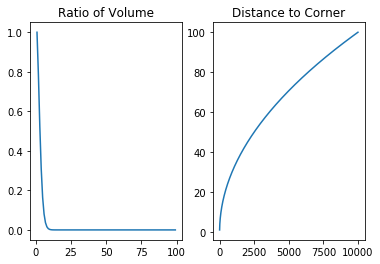

In [1]:
#Import needed python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 

#The Unit Porcupine Plot
#The unit hyper-sphere inscribed within the unit hyper-cube.

fig = plt.figure()
d = range(1,100)
V = [math.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in d]
ax = fig.add_subplot(*[1,2,1])
ax.plot(d, V) 
ax.set_title('Ratio of Volume')

dCorner = [math.sqrt(d) for d in range(1,10000)]
ax = fig.add_subplot(*[1,2,2])
ax.plot(range(1,10000), dCorner) 
ax.set_title('Distance to Corner')

plt.show();

## Volume of space between two spheres with slightly different radii in high dimensions

* $Vol_{crust} = Vol_{S_1} - Vol_{S_2}$ where radius of $S_1$ is greater than the radius of $S_2$
\begin{eqnarray}
Vol_{crust} &=& Vol_{S_1} - Vol_{S_2} \nonumber\\
&=& \left[ 1 - \frac{Vol_{S_2}}{Vol_{S_1}}\right]Vol_{S_1} \nonumber \\
&=& \left[ 1 - \frac{\frac{(a - \epsilon)^D \pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2}+1)}}{\frac{a^D \pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2}+1)}}\right]Vol_{S_1} \nonumber \\
&=& \left[ 1 - \frac{a^D ( 1 - \frac{\epsilon}{a})^D}{a^D}\right]Vol_{S_1}   \nonumber \\
&=&  \left[ 1 - \left( 1 - \frac{\epsilon}{a}\right)^D \right]Vol_{S_1}\nonumber 
\end{eqnarray}

* What happens as $D$ increases?  


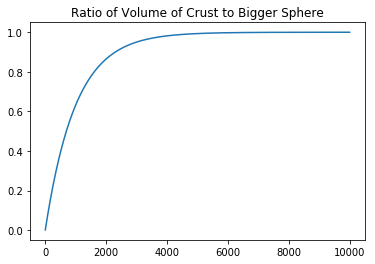

In [2]:
#Crust volume between spheres with epsilon different radii and increasing dimensionality
a = 1
eps = 0.001
D = np.arange(1,10000)
RatioVol = [1-(1-eps/a)**d for d in D]
fig = plt.figure()
plt.plot(D, RatioVol)
plt.title('Ratio of Volume of Crust to Bigger Sphere')
plt.show() 

## Radius needed to cover the same percentage volume with growing dimensionality:  

* Volume of unit line, square, cube, hyper-cube:  $s^D = 1^D$
* Side of a cube covering some percentage of the area: say, 10% would be $r^D = 1/10$, $r = (1/10)^{(1/D)}$
* What happens as D increases? 


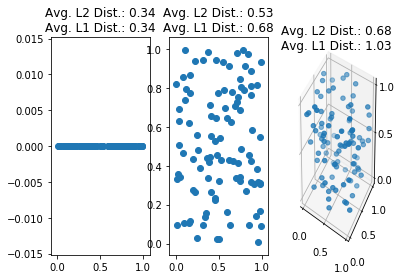

In [3]:
'''Illustrate that average distance between uniform random points increases when dimensionality
increases and number of data points held constant. Illustrates that you need more and more
points to characterize the unit cube as you go up in dimensionality.'''

from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as sc 
import textwrap

N = 100

x1 = np.random.uniform(0,1,(N,1)) #generate N uniform random data points in the unit interval
x2 = np.random.uniform(0,1,(N,2)) #generate N uniform random data points in the unit square
x3 = np.random.uniform(0,1,(N,3)) #generate N uniform random data points in the unit cube
y1 = np.mean(sc.pdist(x1, 'euclidean')) #compute avg euclidean distance between points
y2 = np.mean(sc.pdist(x2, 'euclidean'))
y3 = np.mean(sc.pdist(x3, 'euclidean'))
z1 = np.mean(sc.pdist(x1, 'cityblock')) #compute l1 distance between points
z2 = np.mean(sc.pdist(x2, 'cityblock'))
z3 = np.mean(sc.pdist(x3, 'cityblock'))

#plot results
fig = plt.figure()
ax = fig.add_subplot(*[1,3,1])
ax.scatter(x1, np.zeros((N,1)))
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y1) + ' Avg. L1 Dist.: ' + str("%.2f"%z1);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,2])
ax.scatter(x2[:,0], x2[:,1]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y2) + ' Avg. L1 Dist.: ' + str("%.2f"%z2);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,3], projection='3d')
ax.scatter(x3[:,0], x3[:,1], x3[:,2]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y3) + ' Avg. L1 Dist.: ' + str("%.2f"%z3);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))
plt.show();

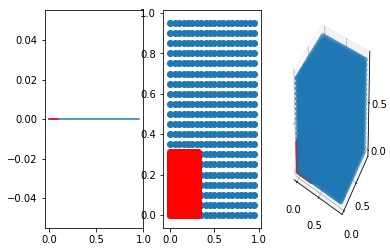

In [4]:
#Percentage Volume Illustration (p=.1)

p = 0.1
fig = plt.figure()
x = np.arange(0,1,.05)

# 1D 
ax = fig.add_subplot(*[1,3,1])
ax.plot(x, np.zeros(x.size))
z = np.arange(0,p,.01)
ax.plot(z, np.zeros(z.size), 'r')

# 2D 
ax = fig.add_subplot(*[1,3,2])
[xx,yy] = np.meshgrid(x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy] = np.meshgrid(z,z)
ax.scatter(xx, yy)
ax.scatter(zx, zy, color='red')

# 3D 
ax = fig.add_subplot(*[1,3,3], projection='3d')
[xx,yy,zz] = np.meshgrid(x,x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy,zz2] = np.meshgrid(z,z,z)
ax.scatter(xx, yy, zz)
ax.scatter(zx, zy, zz2, color='red')
plt.show()